In [118]:
import pandas as pd
import numpy as np

In [119]:
data = pd.read_csv('data/ski_resort_data.csv')

In [120]:
data.nunique()/len(data)

Name                 0.996970
Region               0.115152
state                0.106061
summit_elev          0.806061
vertical_drop        0.584848
base_elev            0.739394
trams                0.015152
fastEight            0.006061
fastSixes            0.021212
fastQuads            0.042424
quad                 0.021212
triple               0.027273
double               0.030303
surface              0.036364
total_chairs         0.093939
Runs                 0.333333
TerrainParks         0.033333
LongestRun_mi        0.127273
SkiableTerrain_ac    0.584848
Snow Making_ac       0.433333
daysOpenLastYear     0.336364
yearsOpen            0.218182
averageSnowfall      0.324242
AdultWeekday         0.251515
AdultWeekend         0.245455
projectedDaysOpen    0.272727
NightSkiing_ac       0.236364
dtype: float64

In [121]:
df = data.drop(['Name', 'state'], axis=1)

In [122]:
df.fillna(df.median(), inplace=True)

C:\Users\Jared\AppData\Local\Temp\ipykernel_19088\3604797450.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [123]:
Regiondumies=pd.get_dummies(df['Region'])
df = pd.concat([df, Regiondumies], axis=1).drop('Region',axis=1)
df

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,Sierra Nevada,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,3939,2500,250,1,0.0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600,1540,1200,0,0.0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,2090,294,1796,0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11500,2300,9200,0,0.0,1,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0
4,11100,1800,9200,0,0.0,0,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,9500,1000,8500,0,0.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
326,7428,810,6619,0,0.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
327,7808,1571,6237,0,0.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
328,9663,990,8798,0,0.0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,1


In [124]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize, scale, StandardScaler


In [125]:
X=df.values
X=StandardScaler().fit_transform(df)
X

array([[-0.1750243 ,  1.3572862 , -1.0037286 , ..., -0.11076976,
        -0.22573306, -0.15762208],
       [-0.53401788,  0.34294523, -0.69849743, ..., -0.11076976,
        -0.22573306, -0.15762208],
       [-0.6707518 , -0.97358483, -0.50700504, ..., -0.11076976,
        -0.22573306, -0.15762208],
       ...,
       [ 0.86227679,  0.37569999,  0.91987035, ..., -0.11076976,
        -0.22573306,  6.34428877],
       [ 1.35961292, -0.23818762,  1.74270932, ..., -0.11076976,
        -0.22573306,  6.34428877],
       [ 1.31591169, -0.12196105,  1.61483353, ..., -0.11076976,
        -0.22573306,  6.34428877]])

In [126]:
pca = PCA(n_components=len(df.columns))
pcomps = pca.fit_transform(X)
pca.components_.shape

(62, 62)

In [127]:
pca.components_[1,:]

array([-0.33005571, -0.11244179, -0.35969972,  0.15132331,  0.10049098,
        0.19180165,  0.11589232,  0.17901011,  0.16342808,  0.06017093,
        0.3589729 ,  0.3135378 ,  0.08162656,  0.23676315,  0.00246557,
       -0.09207236,  0.16611307, -0.034099  ,  0.02268168, -0.28583171,
       -0.05230955,  0.00662879, -0.07614447,  0.0100521 , -0.04061605,
       -0.06218725, -0.05902799,  0.03408952, -0.12007271,  0.05739867,
        0.05497532,  0.0040634 ,  0.02629375,  0.03687915,  0.05233668,
        0.12144111,  0.0890434 ,  0.01860428, -0.06726619, -0.06129841,
       -0.06625212,  0.04824494,  0.0317259 , -0.12728763,  0.06259125,
       -0.02203607, -0.04744797,  0.07287774, -0.09710014,  0.09366065,
        0.00381903, -0.03376942, -0.05841609, -0.04754127, -0.00765035,
       -0.12329555,  0.08438046,  0.01273559, -0.07527787, -0.00189739,
        0.09202332, -0.14427478])

In [128]:
pca.components_[1,:].dot(pca.components_[2,:]) # components are perpendicular

-7.494005416219807e-16

In [129]:
print(pcomps)

[[ 2.19103390e+00 -1.42456268e+00 -3.77139723e+00 ... -1.36246168e-01
  -1.20424679e-15 -2.42254266e-15]
 [-1.68368726e+00 -1.59195576e+00 -4.93203021e-01 ...  8.56266361e-02
   2.84608780e-15  3.22257841e-15]
 [-2.25991985e+00 -8.85955494e-01 -8.17728934e-01 ...  5.07491987e-02
  -1.58004312e-15 -7.04640875e-16]
 ...
 [-9.40311324e-02 -2.87835562e+00 -9.55358193e-03 ... -2.10745249e-02
   4.49190505e-16  2.06777893e-16]
 [-3.61839799e-01 -3.07507581e+00  9.49242263e-01 ...  1.86174441e-02
   1.37236935e-15 -2.15212404e-16]
 [-8.78128577e-01 -3.11069088e+00  8.85627015e-01 ... -1.32303058e-02
   5.23970942e-16 -2.32567032e-17]]


In [130]:
expl_var = pca.explained_variance_ratio_
expl_var # variance contributions from each component

array([1.47902751e-01, 4.94784495e-02, 3.17015652e-02, 2.80470666e-02,
       2.44962193e-02, 2.33100819e-02, 2.20225958e-02, 2.12342622e-02,
       2.02018719e-02, 1.96156054e-02, 1.91369642e-02, 1.81161674e-02,
       1.76722748e-02, 1.74257052e-02, 1.73016417e-02, 1.72063275e-02,
       1.71017741e-02, 1.69595757e-02, 1.68419801e-02, 1.67415126e-02,
       1.66962482e-02, 1.66478128e-02, 1.65758348e-02, 1.65036424e-02,
       1.64845286e-02, 1.64492599e-02, 1.63869363e-02, 1.63531647e-02,
       1.63387142e-02, 1.63363958e-02, 1.63085160e-02, 1.62599278e-02,
       1.62478392e-02, 1.62317884e-02, 1.62218063e-02, 1.62089938e-02,
       1.62036357e-02, 1.55186169e-02, 1.43000780e-02, 1.38936988e-02,
       1.27317258e-02, 1.26691707e-02, 1.05623491e-02, 9.81553723e-03,
       9.35520923e-03, 8.91530201e-03, 8.52843923e-03, 7.44201834e-03,
       6.96666287e-03, 5.73912339e-03, 5.56990728e-03, 4.30390131e-03,
       3.61624438e-03, 2.49862549e-03, 2.40301852e-03, 1.85558405e-03,
      

In [131]:
cumsum_var = np.cumsum(np.round(expl_var, decimals=4)*100)
cumsum_var
# first 35 components explain 80% of variance

array([14.79, 19.74, 22.91, 25.71, 28.16, 30.49, 32.69, 34.81, 36.83,
       38.79, 40.7 , 42.51, 44.28, 46.02, 47.75, 49.47, 51.18, 52.88,
       54.56, 56.23, 57.9 , 59.56, 61.22, 62.87, 64.52, 66.16, 67.8 ,
       69.44, 71.07, 72.7 , 74.33, 75.96, 77.58, 79.2 , 80.82, 82.44,
       84.06, 85.61, 87.04, 88.43, 89.7 , 90.97, 92.03, 93.01, 93.95,
       94.84, 95.69, 96.43, 97.13, 97.7 , 98.26, 98.69, 99.05, 99.3 ,
       99.54, 99.73, 99.86, 99.92, 99.96, 99.96, 99.96, 99.96])

Text(0, 0.5, '% of variance explained')

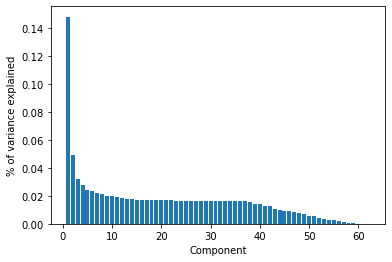

In [132]:
import matplotlib.pyplot as plt
# Scree Plot
plt.bar(range(1,63), expl_var)
plt.xlabel('Component')
plt.ylabel('% of variance explained')


In [133]:
pca=PCA(n_components=35)
pcomps=pca.fit_transform(X)
pca.components_.shape, pca.components_[0,:]

((35, 62),
 array([ 0.24178335,  0.2920906 ,  0.20408502,  0.2267546 ,  0.06780359,
         0.17917463,  0.26153499,  0.08846244,  0.13719229,  0.07285296,
         0.0903468 ,  0.25504537,  0.29504914,  0.16834967,  0.25421596,
         0.18527508,  0.19559767,  0.21549342, -0.00282639,  0.2206378 ,
         0.22284274,  0.21781921,  0.19528792,  0.05620292, -0.00610202,
         0.01571141,  0.14576039, -0.03165714,  0.01511966, -0.03824627,
        -0.02111563, -0.03112409, -0.01948459, -0.0003137 , -0.0379406 ,
        -0.06309289, -0.0461569 , -0.02412902,  0.03232739,  0.02016332,
        -0.01750924, -0.00333666, -0.01274632,  0.02193523, -0.04647284,
        -0.02795644, -0.00737601, -0.03049973,  0.00094787, -0.04796104,
        -0.01942601,  0.09668319,  0.08541877, -0.00791693, -0.01575747,
         0.02778772,  0.04587616, -0.02510609,  0.02168417, -0.00316926,
        -0.05098327,  0.00672698]))

In [134]:
np.sqrt(pca.components_[0,:].dot(pca.components_[0,:])) # components are normalized basis vectors

0.9999999999999989

In [135]:
expl_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(np.round(expl_var, decimals=4)*100)
print(expl_var)
print("="*75)
print(cumsum_var)

[0.14790275 0.04947845 0.03170157 0.02804707 0.02449622 0.02331008
 0.0220226  0.02123426 0.02020187 0.01961561 0.01913696 0.01811617
 0.01767227 0.01742571 0.01730164 0.01720633 0.01710177 0.01695958
 0.01684198 0.01674151 0.01669625 0.01664781 0.01657583 0.01650364
 0.01648453 0.01644926 0.01638694 0.01635316 0.01633871 0.0163364
 0.01630852 0.01625993 0.01624784 0.01623179 0.01622181]
[14.79 19.74 22.91 25.71 28.16 30.49 32.69 34.81 36.83 38.79 40.7  42.51
 44.28 46.02 47.75 49.47 51.18 52.88 54.56 56.23 57.9  59.56 61.22 62.87
 64.52 66.16 67.8  69.44 71.07 72.7  74.33 75.96 77.58 79.2  80.82]


Text(0, 0.5, '% of variance explained')

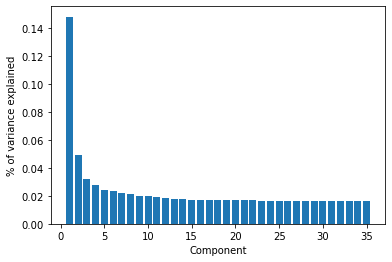

In [136]:
# Scree Plot
plt.bar(range(1,36),expl_var)
plt.xlabel('Component')
plt.ylabel('% of variance explained')


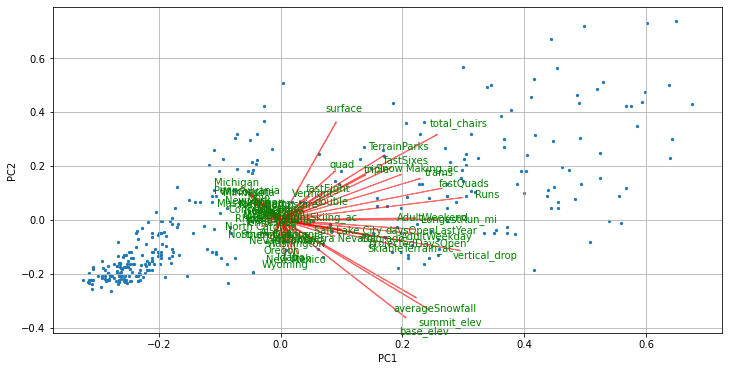

In [137]:
X=pd.DataFrame(X,columns=df.columns)
# biplot
score = np.array(X)[:,0:2]
xs, ys = score[:,0], score[:,1]

coeff = np.transpose(pca.components_[0:2,:])
n = coeff.shape[0]
scalex = 1.0/(xs.max()-xs.min())
scaley = 1.0/(ys.max()-ys.min())
fig = plt.figure(figsize=(12,6))
plt.scatter(xs*scalex, ys*scaley, s=5)

labels=list(X.columns)

for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
    if labels is None:
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
    else:
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

In [138]:
np.transpose(pca.components_[0:2,:])[:10] # each row corresponds to a feature's coeffs in terms of first 2 principal components

array([[ 0.24178335, -0.33005571],
       [ 0.2920906 , -0.11244179],
       [ 0.20408502, -0.35969972],
       [ 0.2267546 ,  0.15132331],
       [ 0.06780359,  0.10049098],
       [ 0.17917463,  0.19180165],
       [ 0.26153499,  0.11589232],
       [ 0.08846244,  0.17901011],
       [ 0.13719229,  0.16342808],
       [ 0.07285296,  0.06017093]])

In [144]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_mat = pd.DataFrame(loadings, columns=[f'PC{n+1}' for n in range(loadings.shape[1])], index=X.columns)
loading_mat


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
summit_elev,0.733279,-0.578962,0.266666,-0.048172,0.003088,0.122728,-0.094180,-0.009770,-0.088969,-0.013760,...,0.004979,-0.005692,0.003867,0.003235,0.009696,0.007360,0.006799,-0.005831,0.001770,-0.003687
vertical_drop,0.885851,-0.197238,0.005007,-0.011527,0.085457,-0.171250,0.118698,-0.078082,0.037512,0.011383,...,0.020343,-0.005803,-0.000169,-0.000068,-0.005233,-0.002156,0.002152,0.001714,0.002604,0.011058
base_elev,0.618948,-0.630962,0.322791,-0.047592,-0.024607,0.203076,-0.143616,0.007045,-0.116056,-0.017790,...,0.002817,-0.003608,-0.002205,0.001329,0.004158,-0.003414,-0.002278,0.001861,-0.001706,-0.003194
trams,0.687700,0.265441,0.095780,-0.217866,-0.039641,-0.195173,-0.030364,0.074039,-0.009308,-0.043226,...,-0.022623,-0.020074,-0.018827,0.003221,-0.008954,0.013207,0.008096,-0.005961,0.003145,-0.013877
fastEight,0.205634,0.176275,0.364667,0.202965,0.320819,-0.021378,0.366584,-0.134462,-0.014264,0.068284,...,-0.004451,0.003982,-0.004573,0.004984,-0.011993,0.012758,0.004275,-0.000872,-0.001298,-0.004970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virginia,-0.076142,0.022340,0.023119,-0.141826,-0.004419,-0.071450,-0.029851,0.028674,-0.094406,-0.047002,...,-0.085657,-0.015015,0.166411,0.121618,-0.305117,-0.411168,0.020332,0.065181,0.039751,-0.107656
Washington,0.065764,-0.132048,-0.180477,0.399148,0.313448,-0.133833,-0.211578,0.236113,-0.021405,-0.024905,...,-0.082559,0.183523,-0.136519,-0.027574,0.102450,-0.087622,-0.003640,0.010052,-0.056554,-0.066575
West Virginia,-0.009612,-0.003328,-0.085720,-0.147081,0.124801,0.191180,0.082131,0.019393,0.082973,-0.102111,...,-0.337494,0.243680,0.337505,0.253673,-0.020902,-0.244568,0.177486,-0.097119,0.097080,-0.051572
Wisconsin,-0.154622,0.161421,0.031178,0.038365,-0.090514,-0.016417,-0.156933,-0.039708,0.093640,-0.000691,...,-0.135075,0.000801,-0.001158,-0.054728,-0.010857,-0.024252,-0.016713,-0.026474,-0.015428,0.020435


<AxesSubplot:>

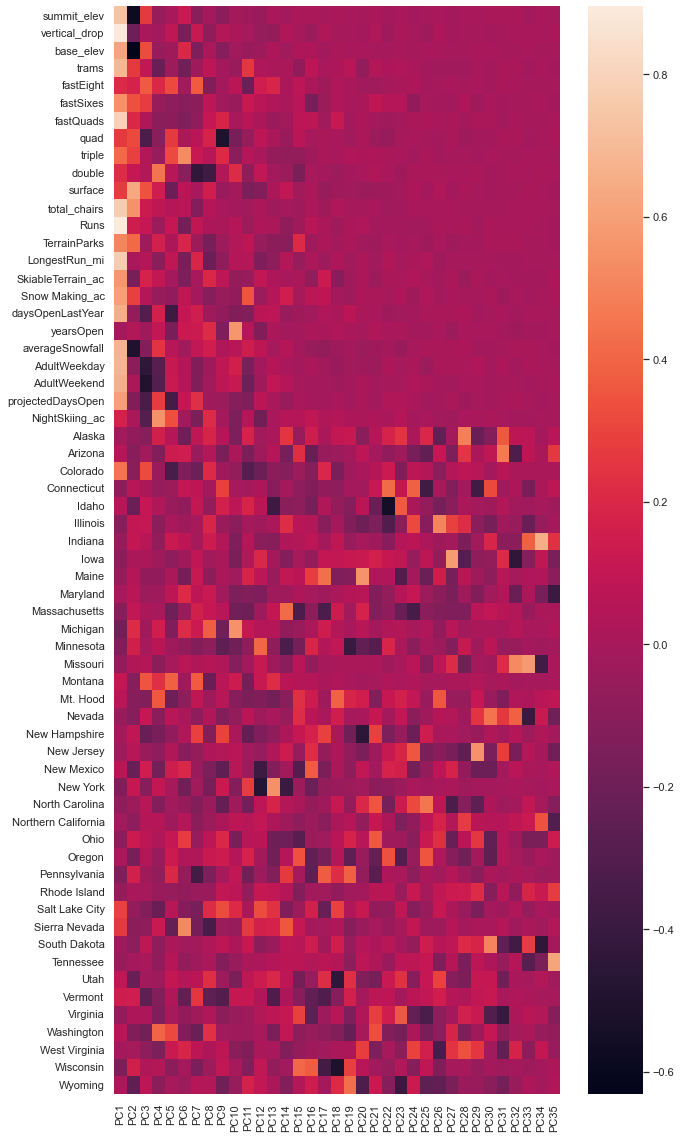

In [154]:
import seaborn as sns; sns.set_theme()
fig = plt.figure(figsize=(10, 20))
sns.heatmap(loading_matrix, ax=fig.add_subplot(111))